# 3. Construcción del modelo ANFIS

In [ ]:
options(warm=-1)  # no mostrar mensajes de alerta

In [2]:
# Librerias necesarias para el modelo

library(frbs) # libreria para generar las redes neuronales
library(readxl)   # libreria para leer datos de excel

El modelo ANFIS Es una metodología que genera reglas difusas del tipo Takagi-Sugeno. Este modelo en lugar de trabajar con variables lingüísticas, usa reglas cuyas partes consecuentes están representadas por una función de las variables de entrada. Según Ojeda Magaña (2010), una regla típica tiene la siguiente forma:

R1:Si x1  es A1^j y xn  es An^j                           

entonces

y= fj (x1,x2,…,xn )  j=1,2…M

Siendo $xi,i=1…n$,  las entradas del sistema, e $y$ es la salida inferida por la regla $j$. Los elementos $An^j$ son los conjuntos difusos del antecedente de la regla $j$ definidos en los universos de discurso de sus entradas asociadas. Y,  la función $fj(x)$, que calcula la consecuencia inferida.

La siguiente figura representa la arquitectura ANFIS haciendo uso de 5 capas y dos entradas:

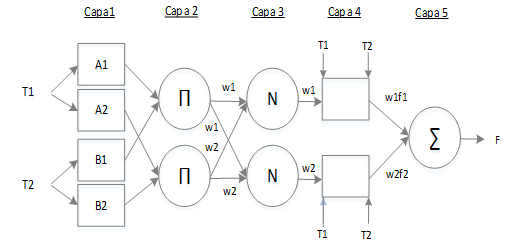

Capa 1: en la primera capa se realiza el proceso de fusificación, mediante funciones de pertenencia, esta capa contiene nodos adaptativos con funciones de nodo descritas de la siguiente forma:

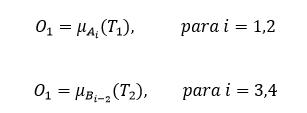

Donde A y B son las etiquetas lingüísticas asociadas a cada entrada. Existen muchas funciones de pertenencia, pero de acuerdo con Abdulshahed, Longstaff, & Fletcher (2015) una función gaussiana con máximo 1 y minino 0 generalmente se adapta a este modelo.

Capa 2: Esta capa contiene nodos fijos denotados por Π, donde la función del nodo se multiplica por las señales de entrada, las cuales servirán luego como señales de salida. 

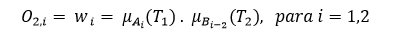

Siendo O(2,i)  la salida de la capa 2 y w(i) indica la señal de salida que representa la fuerza de disparo de la regla.

Capa 3: los nodos de esta capa también son nodos fijos, etiquetados por la letra N, con la función de normalizar la fuerza de disparo de la regla mediante el cálculo de la relación entre la fuerza de disparo de la regla del nodo i con la suma de las fuerzas de disparo de todas las reglas.  

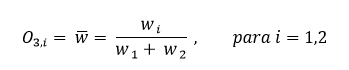

En la cual O(3,i) indica la salida de la capa 3 y w ̅  presenta la fuerza de disparo normalizada.

Capa 4: en esta capa los nodos son adaptativos y la función del nodo es:

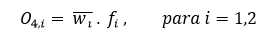

Donde  f1   y f2 son las reglas the fuzzy if–then: 
Regla 1: si T1 es A1 y T2 es B1, entonces f1= p1T1+ q1T2+ r1
Regla 2: si T1 es A2 y T2 es B2, entonces f2= p2T1+ q2T2+ r2                
Siendo  pi,qi  y ri los parámetros establecidos como parámetros consecuentes.

Capa 5: en esta capa cada nodo es fijo y se denota por ∑ , con la función de nodo para calcular la salida definida como: 

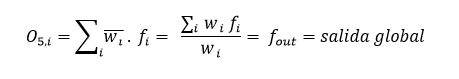

La función de pertenencia que se aplica a los datos para fusificarlos es la función Gaussiana:

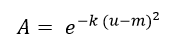

está definida por un valor medio m y una desviación estándar k > 0, con forma de campana, la cual se hace más estrecha entre menor sea k.

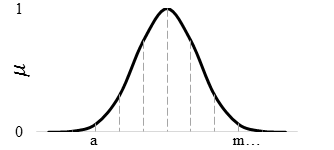

Para el desarrollo del modelo ANFIS se utiliza la metodologia que se expone en la siguiente figura:

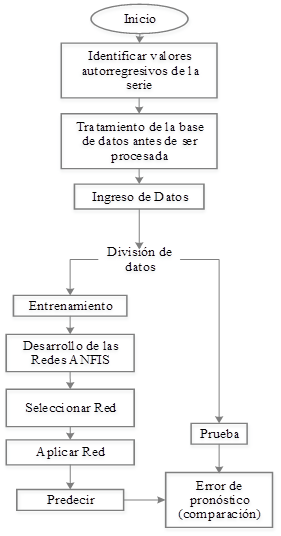

Los valores autorregresivos de la serie se identifican a traves de las graficas de autocorrelación parcial de los datos en la sección del modelo ARIMA-RNA. El tratamiento de los datos que se lleva a cabo antes de ser procesada es seleeccionar las variables que se utilizaran dentro de los modelos para generar las variables respuesta.

La base de datos que se utiliza para el modelo es obtenida a traves del tratamiento de la data "DATAporDia" generada en el notebook del modelo Híbrido; esta data se carga en Excel 2016, se modifica y se carga nuevamente al notebook. Se presentan los primeros 5 datos del banano del dias martes con la respectiva identificación de los rezagos:

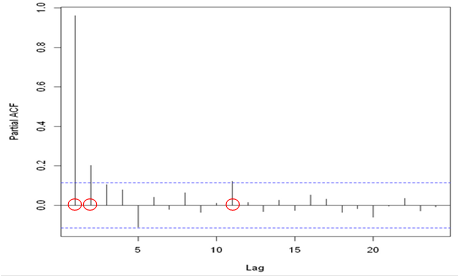

In [4]:
data_Bam= read_excel("DATOSAFBamar.xlsx") # Base de datos banano martes ANFIS
data_Bam<-data.frame(data_Bam)
head(data_Bam[,1:length(data_Bam)])

# La última columna hace referencia a la base de datos totales que sera utilizada 
# para la comparación, Bamy variable a pronósticar, X1, X2, X11 son las variables de entrada

X11,X2,X1,Bamy,Bam
717,783,883,889,717
867,883,889,883,867
792,889,883,883,792
733,883,883,850,733
750,883,850,883,750
783,850,883,883,783


Con el objetivo de realizar una validación de los datos, estos se dividen en dos conjuntos, el primero es un conjunto de entrenamiento compuesto por el 80% con el que se genera el modelo de los datos, y el segundo es un conjunto de prueba definido por el 20% del total de los datos los cuales son utilizados para validar el modelo generado en la etapa de entrenamiento.


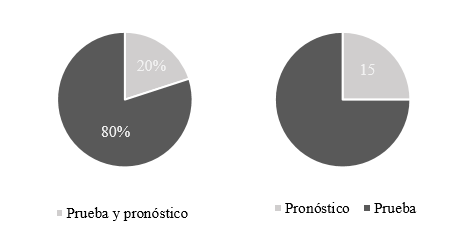

Del total de los datos, se utiliza un 80% para el entrenamiento, un 20% para la prueba de los cuales se obtienen 15 datos con los que se valida el modelo en comparación de los otros. Debido a que la cantidad de datos cambian según el número de rezagos a continuación se presenta el número de datos que son clasificados en entrenamiento y prueba.

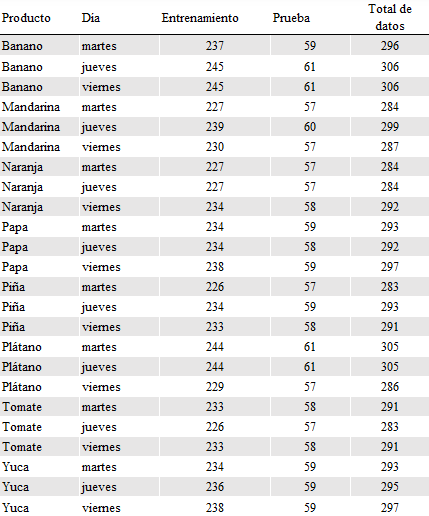

Para el desarrollo de los modelos se deben tener en cuenta los parámetros que se explican a continuación ya que son requeridos por la función.


|Parámetro	                    |Valor
-- | --
|Rango	                        |Valor mínimo y máximo en los que se debe generar la predicción
|Datos	                        |Entrenamiento
|Tamaño del paso	            |0.01
|Tasa de aprendizaje	        |0.005
|Función de pertenencia	        |Gaussiana
|Numero de conjuntos difusos	|3 (bajo, medio, alto)
|Intersección difusa	        |MIN
|Unión difusa	                |MAX
|Función de implicación 	    |Zadeh
|Método 	                    |ANFIS

## Modelo ANFIS

A continuación, se presenta el desarrollo del modelo ANFIS para el Banano del dia martes. Los modelos ANFIS de los demas productos se enuentra en la misma carpeta del presente notebook en un R code denominado "Modelos ANFIS Apendice.ipynb" y la data obtenida despúes del procesamiento de los modelos se encuentra en la data denominada "Datos Resultados ANFIS". Para el desarrollo del modelo ANFIS se desarrolla tambien un modelo independiente utilizando reglas de tipo Mamdani el cual se encuentra en el R code "WM Banano martes.ipynb", este unicamente se lleva a cabo para el banano del dia martes con el objetivo de contrastar los resultados que se obtienen con ambos modelos.

The following objects are masked from testbm (pos = 3):

    Bamy, X1, X11, X2



  |======================================================================| 100%
The name of model:  sim-0 
Model was trained using:  ANFIS 
The names of attributes:  X11 X2 X1 Bamy 
The interval of training data:  
     X11   X2   X1 Bamy
min  678  678  678  678
max 1883 1883 1883 1883
Type of FRBS model: 
[1] "TSK"
Type of membership functions: 
[1] "GAUSSIAN"
Type of t-norm method: 
[1] "Standard t-norm (min)"
Type of s-norm method: 
[1] "Standard s-norm"
Type of implication function: 
[1] "ZADEH"
The names of linguistic terms on the input variables:  
[1] "small"  "medium" "large"  "small"  "medium" "large"  "small"  "medium"
[9] "large" 
The parameter values of membership function on the input variable (normalized):  
             small    medium         large        small    medium large
[1,]  5.000000e+00 5.0000000  5.000000e+00 5.000000e+00 5.0000000 5.000
[2,] 1.553126e-103 0.6737443 7.196516e-103 6.010466e-14 0.9990984 1.000
[3,]  1.000000e-03 0.9959784  1.000000e-03 1.000000e

Warning message in validate.params(object, newdata):
"There are your newdata which are out of the specified range"Warning message in validate.params(object, newdata):
"There are your newdata which are out of the specified range"Warning message in validate.params(object, newdata):
"There are your newdata which are out of the specified range"Warning message in validate.params(object, newdata):
"There are your newdata which are out of the specified range"Warning message in validate.params(object, newdata):
"There are your newdata which are out of the specified range"Warning message in validate.params(object, newdata):
"There are your newdata which are out of the specified range"Warning message in validate.params(object, newdata):
"There are your newdata which are out of the specified range"Warning message in validate.params(object, newdata):
"There are your newdata which are out of the specified range"Warning message in validate.params(object, newdata):
"There are your newdata which are o

  |======================================================================| 100%
The name of model:  sim-0 
Model was trained using:  ANFIS 
The names of attributes:  X2 X1 Bamy 
The interval of training data:  
      X2   X1 Bamy
min  678  678  678
max 1883 1883 1883
Type of FRBS model: 
[1] "TSK"
Type of membership functions: 
[1] "GAUSSIAN"
Type of t-norm method: 
[1] "Standard t-norm (min)"
Type of s-norm method: 
[1] "Standard s-norm"
Type of implication function: 
[1] "ZADEH"
The names of linguistic terms on the input variables:  
[1] "small"  "medium" "large"  "small"  "medium" "large" 
The parameter values of membership function on the input variable (normalized):  
     small     medium     large      small    medium     large
[1,] 5.000 5.00000000 5.0000000 5.00000000 5.0000000 5.0000000
[2,] 0.000 0.05092618 0.7849353 0.00172654 0.5497803 0.7012884
[3,] 0.001 0.98360303 0.4784269 0.01211788 0.9863410 0.5321095
[4,]    NA         NA        NA         NA        NA        NA
[5,

Warning message in validate.params(object, newdata):
"There are your newdata which are out of the specified range"Warning message in validate.params(object, newdata):
"There are your newdata which are out of the specified range"Warning message in validate.params(object, newdata):
"There are your newdata which are out of the specified range"Warning message in validate.params(object, newdata):
"There are your newdata which are out of the specified range"Warning message in validate.params(object, newdata):
"There are your newdata which are out of the specified range"Warning message in validate.params(object, newdata):
"There are your newdata which are out of the specified range"Warning message in validate.params(object, newdata):
"There are your newdata which are out of the specified range"Warning message in validate.params(object, newdata):
"There are your newdata which are out of the specified range"Warning message in validate.params(object, newdata):
"There are your newdata which are o

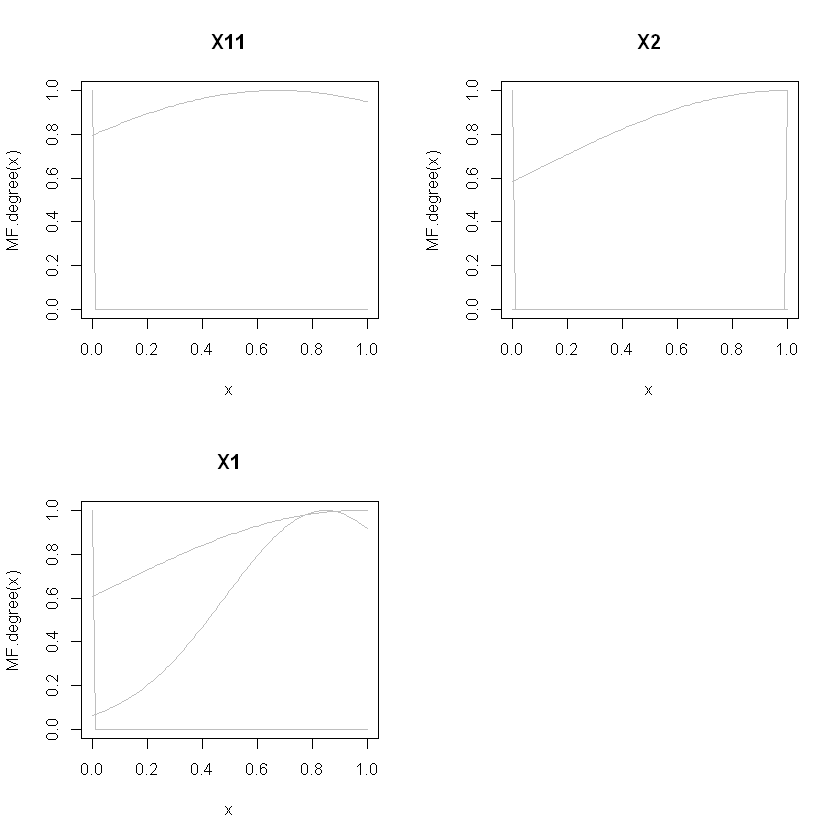

   user  system elapsed 
  11.99    0.14   12.27 

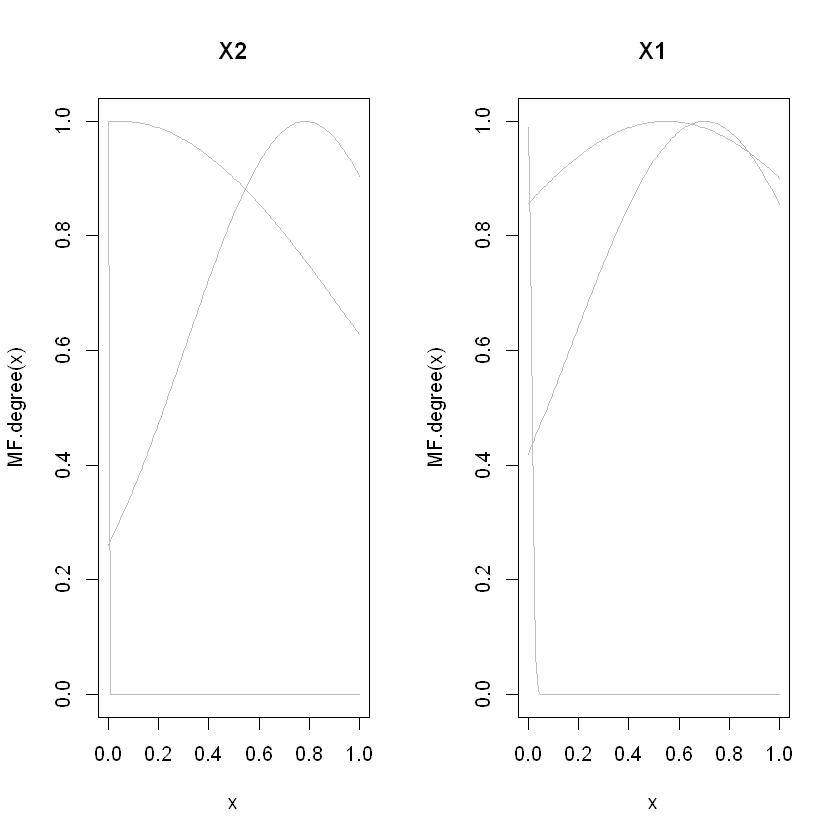

In [6]:
t <- proc.time() # Inicia el cronómetro

RMSE1<-matrix(0, 1, 2) # Variable que guarda los valores de error RMSE de los modelos
MAPE1<-matrix(0, 1, 2) # Variable que guarda los valores de error MAPE de los modelos

trainbm <- data_Bam[1 : 237, 1: 4]   # Datos de entrenamiento 
testbm <- data_Bam[238 : 296, 1 : 4] # Datos de prueba
realbm <- data_Bam[293 : 307, 5]     # Datas de comparación de error

attach(testbm)
b<-Bamy 

for (j in 1:2) { # Bucle que varia el número de variables de entrada utilizadas
  
  # Define el intervalo de los resultados a obtener
  rango <-apply(trainbm[, j: 4], 2, range) # Datos de normalización
  
  # Paraemtros del modelo para ANFIS
  control <- list(num.labels = 3, type.mf= "GAUSSIAN",  step.size = 0.01, type.tnorm = "MIN", type.snorm = "MAX",
                  type.implication.func = "ZADEH")  # Variable que guarda los parámetros utilizados en el modelo
  
  # Modelo
  object.reg <- frbs.learn(trainbm[,j: 4], rango, method.type="ANFIS", control) # Función que ejecueta el modelo
  
  # Gráficas de las funciones de pertenencia para las variables
  plotMF(object.reg)
  
  # Caracteristicas del modelo 
  summary(object.reg)
  
  last_one<- nrow(testbm[, j: 4]) # Define el último valor de la base de datos según las variable usadas
  
  # Contadores usados para determinar en que momento se presentan valores inexitentes en la data (ceros-0)
  flag_1<-0 
  stop_1<-0
  paso_1<-1
  
  # While que permite determinar en numero se encuentra el primer faltante
  while (stop_1==0) {
    if(b[paso_1]!=0)
    {
      flag_1=flag_1+1
    } else{
      stop_1=1
    }
    paso_1=paso_1+1
  }
 
  contbm1<-flag_1 # Contador que toma el valor del primer dato faltante
  
  compbm2<- testbm[last_one, length(testbm)] # Define el valor del último dato de la base de datos testbm
  while(compbm2 ==0){                                                 # While que predice si se cumple condición
    Bamy_r<-(predict(object.reg, within(testbm[,j:4], rm(Bamy))))     # Función de predicción del modelo según testbm
    
    if (contbm1<last_one) {                                           # Condicional que predice y actualiza testbm
      testbm[contbm1+1,3]<- Bamy_r[contbm1]                           # según los valores obtenidos en Bamy_r apenas
      testbm[contbm1+1,2]<- Bamy_r[contbm1-1,]                        # encuentra el primer dato faltante
      testbm[contbm1+1,1]<- Bamy_r[contbm1-10,]
    }
    
    contbm1<-contbm1+1  # Sumar uno a la posición del contador
    testbm[contbm1,length(testbm)]<-Bamy_r[contbm1] # Actualiza el valor pronósticado en la base de datos testbm
    compbm2<- testbm[last_one, length(testbm)] # Actualizar del último dato en el cuál se debe detener el bucle
  }
  
  # Como el bucle se cierra en el penúltimo dato de la serie de datos de prueba se predice el último con la siguiente función
  Bamy_r[last_one]<-(predict(object.reg, within(testbm[last_one,j:4], rm(Bamy)))) 
  
  # Error RMSE y MAPE
  RMSEbm<- sqrt(sum((realbm-Bamy_r[45:59])^2)/(15))
  MAPEbm<- sum(((abs(realbm- Bamy_r[45:59]))/realbm)*100)/(15)
  
  RMSE1[1, j]<-RMSEbm # Guardar errores RMSE
  MAPE1[1, j]<-MAPEbm # Guardar errores MAPE
  
  trainbm <- data_Bam[1 : 237, 1: 4] # cambiar numero por j
  testbm <- data_Bam[238 : 296, 1 : 4] # cambiar numero por j
  realbm <- data_Bam[293 : 307, 5]  
  
}
proc.time()-t

### Referencias Bibliográficas

Ojeda Magaña, B. (2010). Aportación a la extracción de conocimiento aplicada a datos mediante agrupamientos y sistemas difusos, (December), 220. Retrieved from http://oa.upm.es/4838/

Abdulshahed, A. M., Longstaff, A. P., & Fletcher, S. (2015). The application of ANFIS prediction models for thermal error compensation on CNC machine tools. Applied Soft Computing Journal, 27, 158–168. https://doi.org/10.1016/j.asoc.2014.11.012